# Linear Regression

## Linear Regression

Linear regression is one of the simplest regression approaches in machine learning. It is a method used to define a relationship between the input variable(s) $X$ and a single output variable $y$. One needs to identify the dependent variable, which will vary based on the value of the independent variable(s). For example, the value of the house (dependent variable or $y$) varies based on the square meters of the house (independent variable or $x$). Depending upon the number of input variables, linear regression can be classified into two categories:
- Simple Linear Regression (Single Input Variables)
- Multiple Linear Regression (Multiple Input Variables)
 

 
### Simple Linear Regression

In simple linear regression, we have a *single* input variable $x$ and a single output variable $y$. Our goal is to find a linear relationship between these variables. Mathematically, this relationship takes on the form $y = \beta_0 + \beta_1x$, where
- $y$ is the output variable (e.g., value of a house)
- $x$ is the input variable (e.g., size of a house in square meters)
- $\beta_{0}$ is the $y$-intercept/bias (i.e., the value of $y$ when $x=0$)
- $\beta_{1}$ is the coefficient for $x$ (i.e., the slope of the regression line)

You might recognize this expression from your school algebra as the *slope-intercept form* of a line: $y = mx + b$. In the case of simple linear regression, the slope $\beta_{1}$ represents the average increase in the response variable $y$ relative to a one-unit increase in the predictor variable $x$.

### Multiple Linear Regression

Multiple linear regression generalizes simple linear regression by allowing more than one input variable: $x_{1},x_{2},\ldots,x_{n}$. The goal of multiple linear regression is to find a relationship between the input variables an the output variable. This relationship is represented mathematically as follows $$y  = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \cdots + \beta_{n}x_{n}$$
In the case of multiple linear regression, $\beta_{1}$ through $\beta_{n}$ are the estimated regression coefficients for the independent variables $x_{1}$ through $x_{n}$.  The coefficent $\beta_{i}$ ($1 \leq i \leq n$) represents the average increase in $y$ relative to a one-unit increase in $x_{i}$ when all other variables $x_{j}$ ($i \neq j$) are held constant.

In [1]:
# import libraries

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
from IPython.display import display, HTML

### Advertising Dataset

**Dataset Description**

The advertising dataset consists of the number of units of product sold in 200 different markets.  Included with the sales figure are TV, radio, and newspaper advertising budgets.  All values are reported in thousands.  For example, the first row corresponds to 22,100 units sold with \$230,100, \$37,800, and \$69,200 spent on TV, radio, and newspaper marketing, respectively.

In [2]:
data_path = "https://www.statlearning.com/s/Advertising.csv" 

# Read the CSV data from the link
data_df = pd.read_csv(data_path,index_col=0)

# Print out first 5 samples from the DataFrame
data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


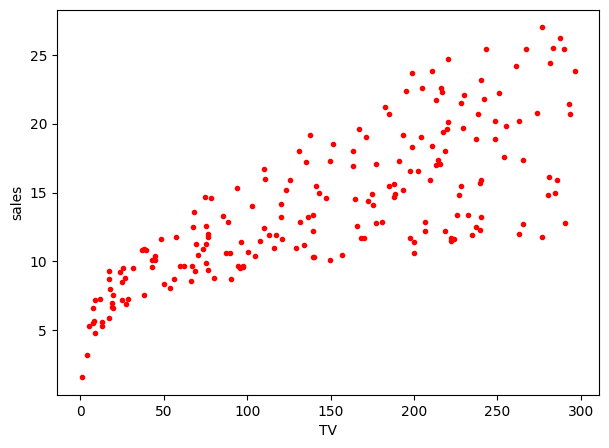

In [10]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.scatter(data = data_df, x = 'TV', y= 'sales', marker = '.', color = 'red')
ax.set_xlabel("TV")
ax.set_ylabel("sales")
plt.show()


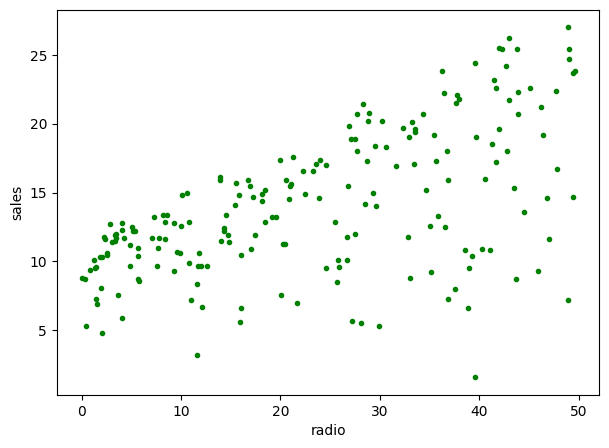

In [11]:
fig, ax = plt.subplots(figsize = (7,5))

ax.scatter(data = data_df, x = 'radio', y= 'sales', marker = '.', color = 'green')
ax.set_xlabel("radio")
ax.set_ylabel("sales")
plt.show()

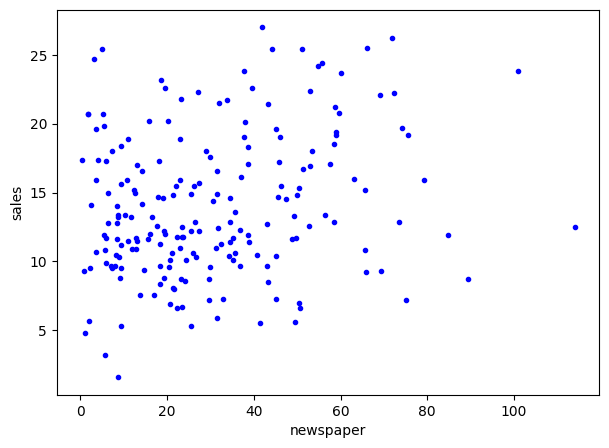

In [12]:
fig, ax = plt.subplots(figsize = (7,5))

ax.scatter(data = data_df, x = 'newspaper', y= 'sales', marker = '.', color = 'blue')
ax.set_xlabel("newspaper")
ax.set_ylabel("sales")

plt.show()

/home/jagannath/fuseAi/ai_ml_venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jagannath/fuseAi/ai_ml_venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jagannath/fuseAi/ai_ml_venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


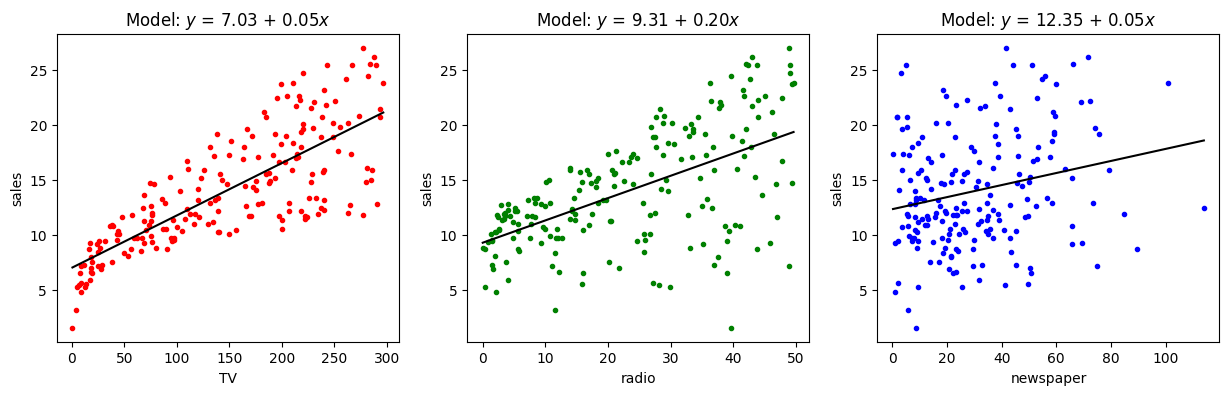

In [28]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

fig = plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,3)

# function for training model and plotting
def train_plot(data_df, feature, ax, c):
  
    
    LR_feature = LinearRegression()
    LR_feature.fit(data_df[[feature]], data_df[["sales"]])

    # Predictions
    X_hat = np.linspace(start=data_df[feature].min(), stop=data_df[feature].max(), num=2)
    y_hat = LR_feature.predict( X_hat.reshape(-1,1) )

    # Plot of sales vs TV
    model = "$y$ = {:.2f} + {:.2f}$x$".format(LR_feature.intercept_[0], *LR_feature.coef_[0])
    ax.scatter(data_df[feature], data_df["sales"], color=c, marker=".")
    ax.plot(X_hat, y_hat, color="black")
    ax.set_xlabel(feature)
    ax.set_ylabel("sales")
    ax.set_title("Model: " + model)
    return ax

# Train model using TV data to predict sales
ax0 = fig.add_subplot(gs[0])
train_plot(data_df, "TV", ax0, "red")

# Train model using radio data to predict sales
ax1 = fig.add_subplot(gs[1])
train_plot(data_df, "radio", ax1, "green")

# Train model using newspaper data to predict sales
ax2 = fig.add_subplot(gs[2])
train_plot(data_df, "newspaper", ax2, "blue")

plt.show()

In [29]:
# Training Linear Regression using TV and Radio features
linear_regression = LinearRegression()
linear_regression.fit(data_df[["TV", "radio"]], data_df[["sales"]])

message = """<strong>TV and Radio</strong> <br>
$y$ = {:.2f} + {:.2f}$x_{{1}}$ + {:.2f}$x_{{2}}$ <br>
$x_{{1}}$ = TV <br>
$x_{{2}}$ = radio
""".format(*linear_regression.intercept_, *linear_regression.coef_[0])
display(HTML( message ))

print("")

# Training Linear Regression using all features
linear_regression = LinearRegression()
linear_regression.fit(data_df[["TV", "radio", "newspaper"]], data_df[["sales"]])
message = """<strong>TV, Radio, and Newspaper</strong> <br>
$y$ = {:.2f} + {:.2f}$x_{{1}}$ + {:.2f}$x_{{2}}$ + {:.2f}$x_{{3}}$ <br>
$x_{{1}}$ = TV <br>
$x_{{2}}$ = radio <br>
$x_{{3}}$ = newspaper
""".format(*linear_regression.intercept_, *linear_regression.coef_[0])
display(HTML( message ))

**TV and Radio:**

Using the TV and radio variables as $x_{1}$ and $x_{2}$, respectively, we obtain a multiple linear regression model of $y = 2.92 + 0.05x_{1} + 0.19x_{2}$. Based on this model, if no money is spent on TV and radio advertising, we would expect to sell 2,920 units of product. We can interpret the $\beta_{1}=0.05$ and $\beta_{2}=0.19$ similar to before. As we increase TV advertising by \$1,000 while keeping radio advertising constant, we expect sales to go up by 50 units. On the other hand, as we increase radio advertising by \$1,000 while keeping TV advertising constant, we would expect sales to go up by 190 units.

**TV, Radio, and Newspaper:**

When attempting to use TV, radio, and newspaper to model sales, we obtain a model of $y = 2.94 + 0.05x_{1} + 0.19x_{2} + 0.00x_{3}$; note that each of the estimated model parameters (i.e., $\beta_{0}$ through $\beta_{3}$) have been rounded to 2 decimal places. The fact that $\beta_{3}\approx 0.0$ implies that it does not affect the sales variable. This agrees with intuition obtained from the scatter plot that there is probably no linear relationship between newspaper advertising and sales.

